week1/day5/assignment5:-

1.   Load and understand the dataset
2.   Clean the dataset thoroughly


1.   Perfomr meaning full analysis
2.   Create at least six visulization

1.   write at leaslt five insight
2.   upload to github







In [ ]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the dataset
dataset = pd.read_csv('/content/insurance.csv')
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:

dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

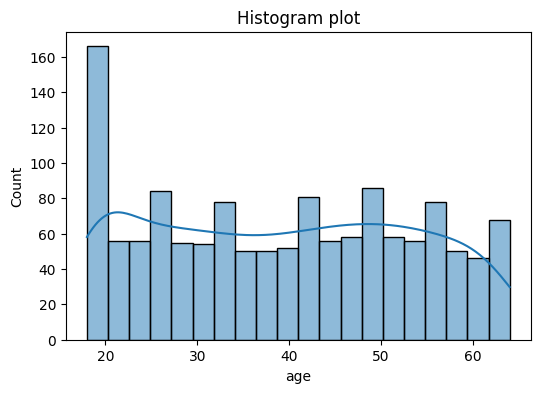

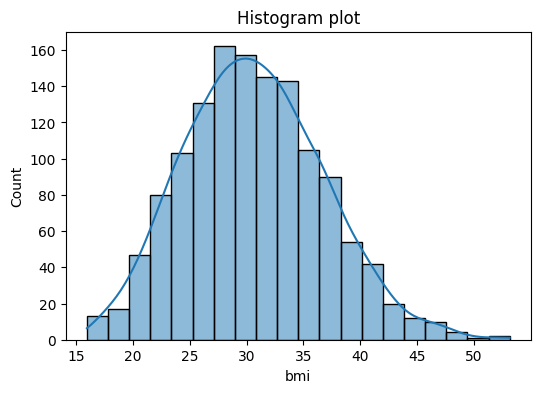

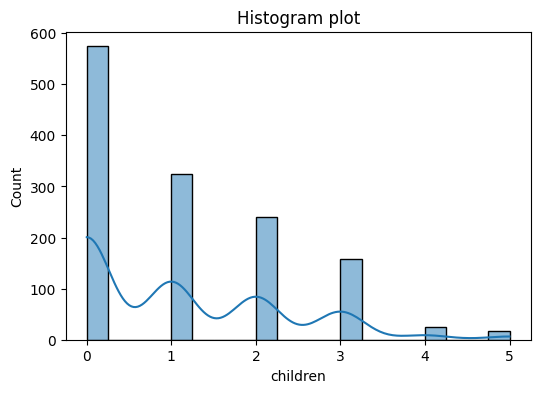

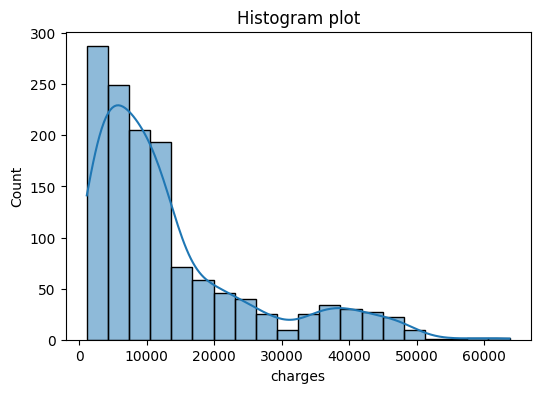

In [ ]:

numeric_column = ['age','bmi','children','charges']
for col in numeric_column:
  plt.figure(figsize= (6,4))
  plt.title("Histogram plot")
  sns.histplot(dataset[col],kde = True,bins = 20)

In [ ]:
(dataset['bmi'] > 340).sum()

np.int64(0)

<Axes: xlabel='smoker', ylabel='count'>

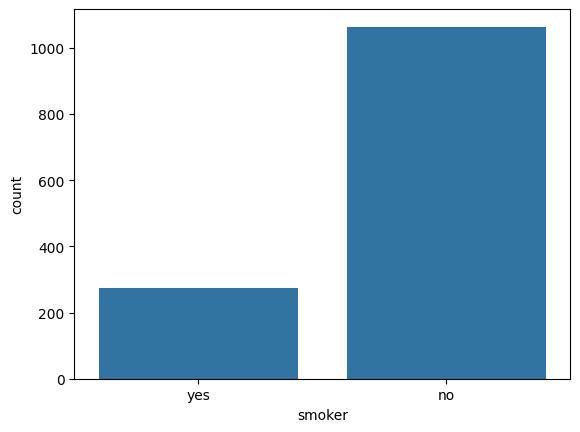

In [ ]:


sns.countplot(x = dataset['smoker'])

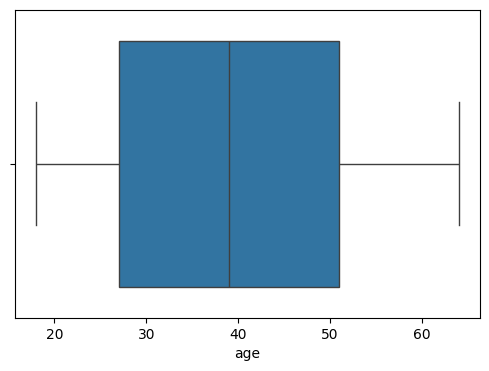

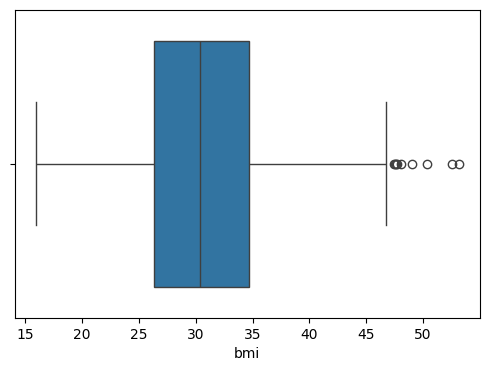

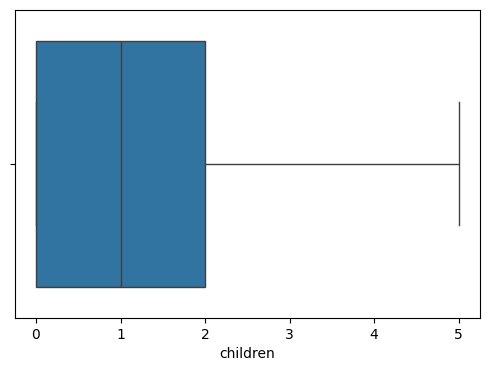

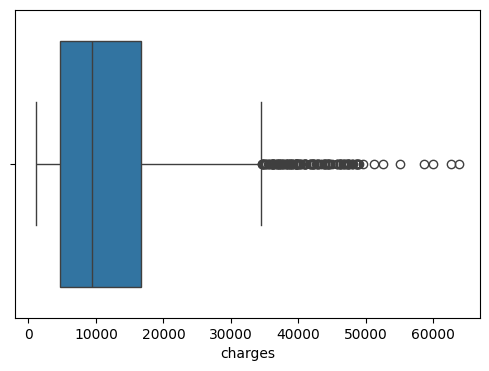

In [ ]:

for col in numeric_column:
  plt.figure(figsize = (6,4))
  sns.boxplot(x = dataset[col])

# To find corrrelation in between numerical column

<Axes: >

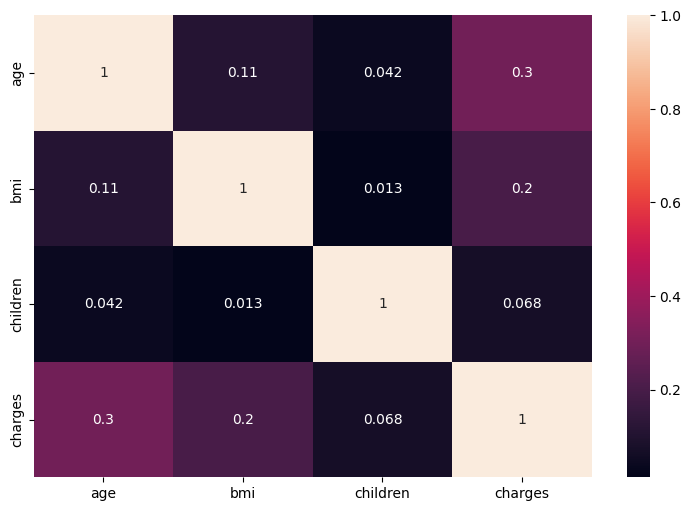

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(dataset.corr(numeric_only=True),annot = True)


# Data cleaning and preprocessing

In [ ]:

data_copy = dataset.copy()
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:

data_copy.shape

(1338, 7)

In [ ]:

data_copy.drop_duplicates(inplace = True)

In [ ]:
data_copy.shape

(1337, 7)

In [ ]:


data_copy.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:

data_copy.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:

data_copy['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
data_copy['sex'] = data_copy['sex'].map({"male" : 0, "female": 1})

In [ ]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:

data_copy['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:

data_copy['smoker'] = data_copy['smoker'].map({"no":0, "yes":1})

In [ ]:
data_copy.rename(columns = {
                            "smoker":"is_smoker"},inplace = True)

# To apply one hot encoding technique

In [ ]:
data_copy = pd.get_dummies(data_copy,columns = ['region'])

In [ ]:
data_copy.head()

,age,sex,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [ ]:

data_copy = data_copy.astype(int)

In [ ]:

data_copy.head()

,age,sex,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


In [ ]:
data_copy['is_smoker'].value_counts()

,count
is_smoker,
0,1063
1,274


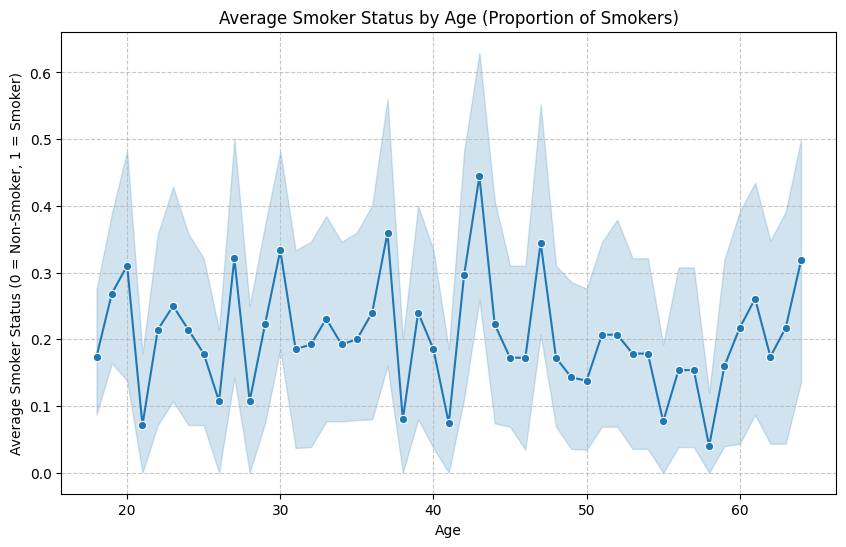

In [ ]:
# create line graph in between age and is_smoker
plt.figure(figsize = (10,6))
sns.lineplot(x = 'age', y = 'is_smoker', data = data_copy, marker='o', errorbar=('ci', 95))
plt.title('Average Smoker Status by Age (Proportion of Smokers)')
plt.xlabel('Age')
plt.ylabel('Average Smoker Status (0 = Non-Smoker, 1 = Smoker)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:

data_copy['bmi_category'] = pd.cut(
    data_copy['bmi'],
    bins = [0,18.5,24.9,29.9,float('inf')],
    labels = ['Underweight','Normal','Overweight','Obese']
)


In [ ]:
data_copy.head()

,age,sex,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [ ]:
data_copy = pd.get_dummies(data_copy,columns = ['bmi_category'],drop_first=True)


In [ ]:

data_copy = data_copy.astype(int)

In [ ]:

data_copy.head()

,age,sex,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,1,0


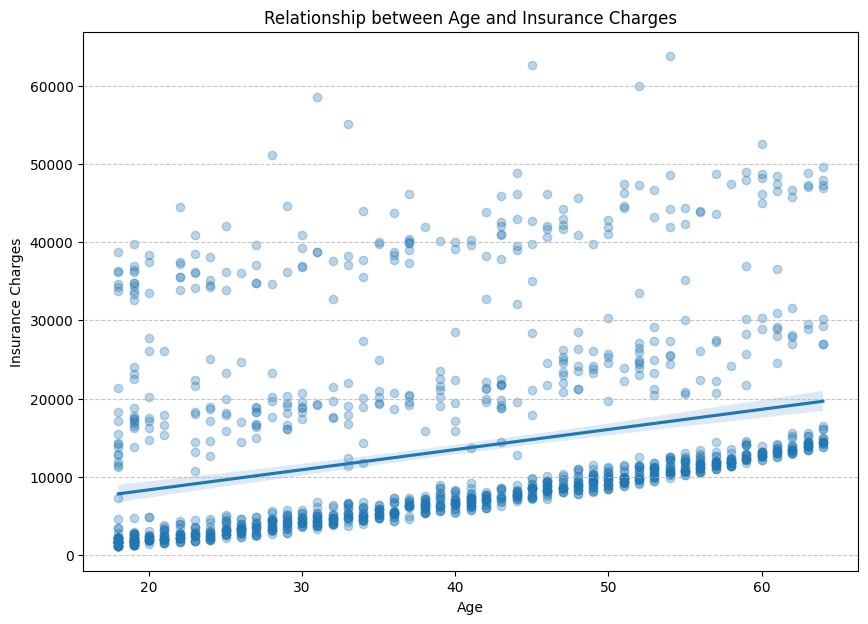

In [ ]:
plt.figure(figsize=(10, 7))
sns.regplot(x='age', y='charges', data=data_copy, scatter_kws={'alpha':0.3})
plt.title('Relationship between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualize Children vs. Charges

### Subtask:
Create a box plot or bar plot to analyze the impact of the number of 'children' on insurance charges. Ensure appropriate labels and a legend are included.


**Reasoning**:
To visualize the distribution of insurance charges based on the number of children, I will create a box plot using the 'children' and 'charges' columns from the `data_copy` DataFrame, ensuring proper labeling and removing the legend as previous warnings suggested.



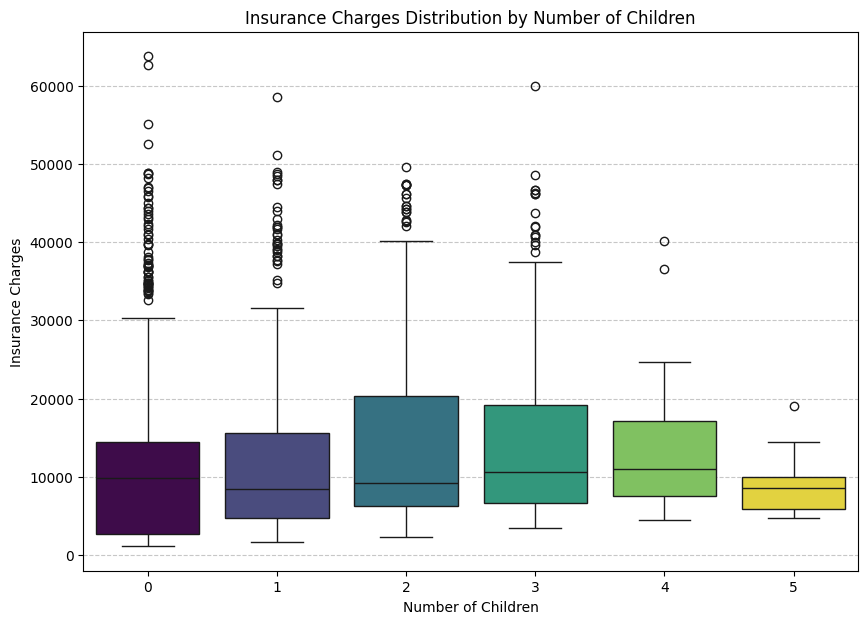

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='children', y='charges', hue='children', data=data_copy, palette='viridis', legend=False)
plt.title('Insurance Charges Distribution by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

```markdown
## Identify Key Insights

### Subtask:
Based on the analysis and visualizations, write down at least five key insights regarding the factors influencing insurance charges. This will involve interpreting the patterns and relationships observed in the data.

#### Instructions
1. Review all the visualizations created: the correlation heatmap, box plots for smoker status, region, BMI category, children, sex, and the scatter plot for age vs. charges.
2. For each visualization, identify the main trends, relationships, or differences observed. For example, note which features have strong correlations with charges, how charges vary across different categories (smoker, region, BMI, sex), and the impact of age and number of children on charges.
3. Synthesize these observations into at least five distinct insights. Each insight should be a clear statement about a factor influencing insurance charges, supported by the visual evidence.
4. Ensure the insights are concise and directly address the patterns found in the data.
```

## Summary:

### Data Analysis Key Findings

*   The correlation matrix, including newly encoded features such as sex, smoker status, region, and BMI categories, was visualized. This allowed for an updated understanding of the relationships between these features and insurance charges.
*   Insurance charges are significantly higher for smokers compared to non-smokers, as clearly depicted by the box plot comparing their distributions.
*   The distribution of insurance charges varies across different geographical regions, suggesting regional differences in healthcare costs or other contributing factors.
*   A clear positive trend exists between age and insurance charges, indicating that older individuals generally incur higher insurance costs, which was visible in the scatter plot with a regression line.
*   Insurance charges tend to increase with higher BMI categories, particularly for 'Overweight' and 'Obese' individuals, as observed from the box plots comparing BMI categories.
*   The number of children appears to influence insurance charges, with varying distributions observed across different family sizes.
*   A comparison of insurance charges by sex revealed differences in their distributions, though the magnitude of this difference relative to other factors was not explicitly quantified.

### Insights or Next Steps

*   **Prioritize key risk factors**: Age, smoker status, and BMI category are major drivers of insurance charges. Actuarial models should heavily weigh these factors.
*   **Further investigate regional differences**: The variations in charges across regions warrant deeper analysis to understand underlying causes, such as local healthcare costs, lifestyle differences, or policy variations. This could inform region-specific pricing strategies.
